In [2]:
from __future__ import print_function

import codecs
import re, os

from pprint import pprint
from time import time
import logging

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
def load_movies(path="../data/raw/"):
    corpus = []
    classes = []
    label = 0
    for cl in os.listdir(path):  # parcours des fichiers d'un répertoire
        for f in os.listdir(path + cl):
            txt = open(path + cl + "/" + f).read()
            corpus.append(txt)
            classes.append(label)
        label += 1  # changer de répertoire <=> changement de classe
    return corpus, classes

X, y = load_movies()
len(X)

2000

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

vectorizer = CountVectorizer(ngram_range=(1,1))
_ = vectorizer.fit_transform(X_train)
s = len(vectorizer.vocabulary_)
print(s)

35209


In [8]:
times = {"nb": [], "lr": [], "svm": []}
for features in range(10000, s, 10000):
    vectorizer = CountVectorizer(ngram_range=(2,2), max_features=features)
    X_train_2 = vectorizer.fit_transform(X_train)
    t0 = time()
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train_2, y_train)
    times["nb"].append(time() - t0)
    t0 = time()
    nb_clf = LogisticRegression(max_iter=10000)
    nb_clf.fit(X_train_2, y_train)
    times["lr"].append(time() - t0)
    t0 = time()
    nb_clf = LinearSVC(max_iter=10000)
    nb_clf.fit(X_train_2, y_train)
    times["svm"].append(time() - t0)

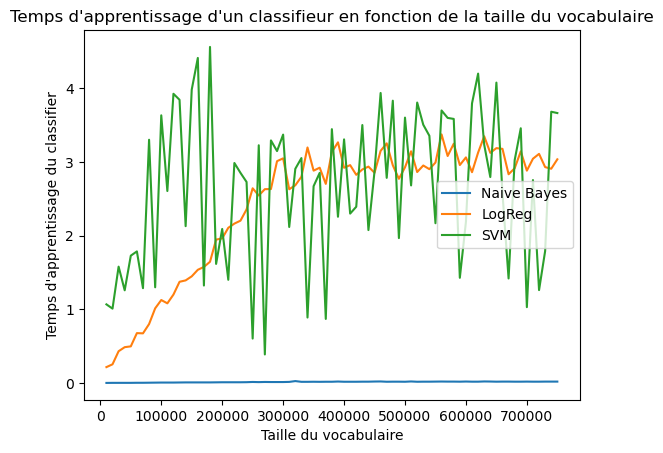

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(10000, s, 10000), times["nb"], label="Naive Bayes")
plt.plot(range(10000, s, 10000), times["lr"], label="LogReg")
plt.plot(range(10000, s, 10000), times["svm"], label="SVM")
plt.legend()
plt.xlabel("Taille du vocabulaire")
plt.ylabel("Temps d'apprentissage du classifier")
plt.title("Temps d'apprentissage d'un classifieur en fonction de la taille du vocabulaire")
plt.show()

In [72]:
import numpy as np
print("nb median", np.median(times["nb"]))
print("lr median", np.median(times["lr"]))
print("svm median", np.median(times["svm"]))

nb median 0.0169830322265625
lr median 4.3034913539886475
svm median 1.4022510051727295
